In [ ]:
                         """  https://github.com/Shivam1795  """

In [1]:
## Import all required libraries ##
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Define custom filters !!

## Averaging filter !!
averaging_kernel = np.ones((3, 3))
avg_filter = np.multiply(averaging_kernel, 1/np.sum(averaging_kernel))

## Gaussian filter !!
gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]])
gaussian_filter = np.multiply(gaussian_kernel, 1/np.sum(gaussian_kernel))


## Sobel_x !!
sobelX = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

## Sobel_y !!
sobelY = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])

## Laplacian edge filter !!
laplacian = np.array([[0, 2,  0],
                      [2, -8, 2],
                      [0, 2,  0]])

In [3]:
## Add all the filters and filter names in lists to apply DFT and visualization !!
filters = [avg_filter, gaussian_filter, sobelX, sobelY, laplacian]
filter_names = ['Averaging filter', 'Gaussian filter', 'Sobel_X', 'Sobel_Y', 'Laplacian']

## Apply fast Fourier transform on each filter and create a scaled, frequency transform image !!
f_filters = [np.fft.fft2(X) for X in filters]
fshift = [np.fft.fftshift(X) for X in f_filters]
freq_spectrum = [np.log(np.abs(X)+1) for X in fshift]

'Areas of white or light gray, allow that part of the frequency spectrum through! \nAreas of black mean that part of the spectrum is blocked out of the image.'

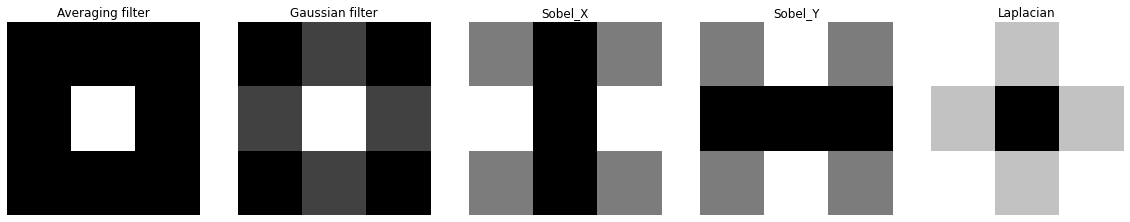

In [4]:
## Display all the frequency spectrums !!
plt.figure(figsize=(20,10))
for i in range(len(filters)):
    plt.subplot(1,5,i+1)
    plt.imshow(freq_spectrum[i], cmap='gray'), plt.axis(False)
    plt.title(filter_names[i]), plt.xticks([]), plt.yticks([])
    
"""Areas of white or light gray, allow that part of the frequency spectrum through! 
Areas of black mean that part of the spectrum is blocked out of the image."""

In [5]:
def f_spectrum(gray_image):
    """
    To compute and return frequency spectrum of given Grayscale image.
    """
    dft = np.fft.fft2(gray_image)
    f_shift = np.fft.fftshift(dft)
    freq_spect = 20*np.log(np.abs(f_shift))
    
    return freq_spect

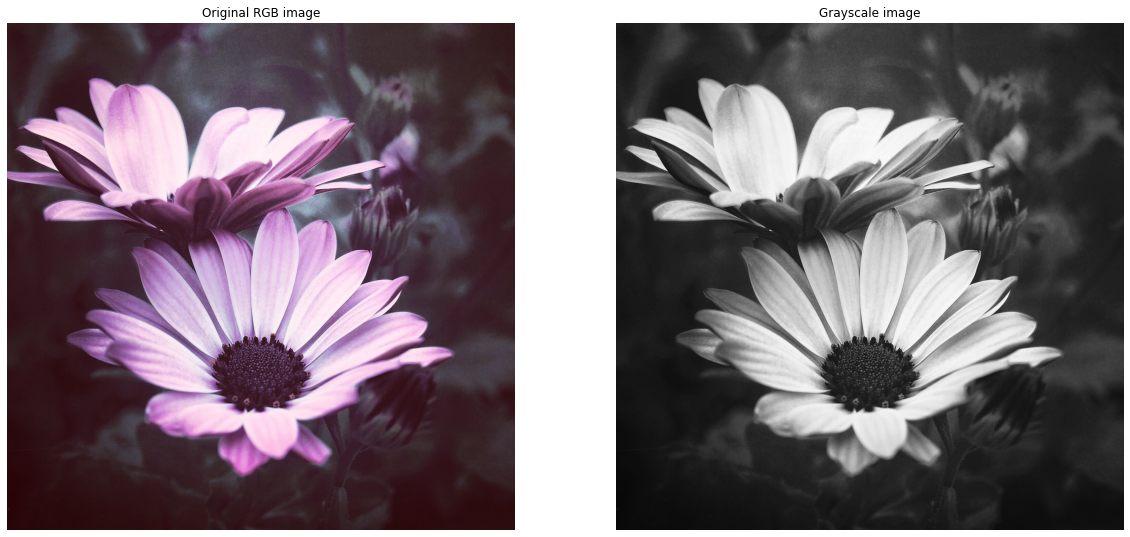

In [6]:
## Read image !!
image = cv2.imread('images/flower.jpg')

## Convert image to RGB to display and create a grayscale copy !!
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Display images !!
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(imgRGB); ax1.title.set_text('Original RGB image'); ax1.axis(False)
ax2.imshow(imgGray, cmap='gray'); ax2.title.set_text('Grayscale image'); ax2.axis(False);

In [7]:
## Computing frequency spectrum of different filtered images to visualize the difference between them !!
filtered_image_spectrum = [f_spectrum(cv2.filter2D(imgGray, -1, X)) for X in filters]
filtered_image_spectrum.insert(0, f_spectrum(imgGray))

spectrum_name = ['Filtered image spectrum ({})'.format(name) for name in filter_names]
spectrum_name.insert(0, 'Original image spectrum')

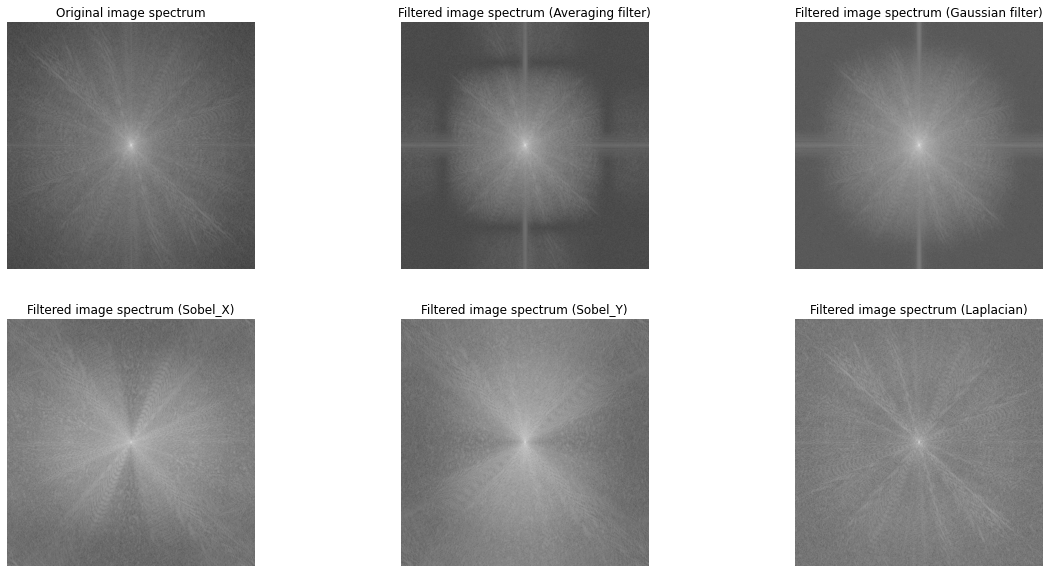

In [8]:
## Display all the frequency spectrums !!
plt.figure(figsize=(20,10))
for i in range(len(filtered_image_spectrum)):
    plt.subplot(2,3,i+1)
    plt.imshow(filtered_image_spectrum[i], cmap='gray'), plt.axis(False)
    plt.title(spectrum_name[i])

In [9]:
## Thanks !!